<a href="https://colab.research.google.com/github/CheeseGue/DataScience/blob/main/%E4%B8%AD%E5%8F%A4%E8%BB%8A%E3%81%AE%E4%BE%A1%E6%A0%BC%E4%BA%88%E6%B8%AC%E3%83%81%E3%83%A3%E3%83%AC%E3%83%B3%E3%82%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price
0,0,nashville,1949,bmw,excellent,6 cylinders,gas,115148,clean,manual,rwd,mid-size,convertible,orange,NaN,27587
1,1,state college,2013,toyota,fair,8 cylinders,gas,172038,clean,automatic,rwd,full-size,sedan,silver,pa,4724
2,2,wichita,1998,ford,good,6 cylinders,gas,152492,clean,automatic,fwd,full-size,SUV,silver,ks,10931
3,3,albany,2014,ford,excellent,4 cylinders,gas,104118,clean,manual,fwd,mid-size,SUV,blue,ny,16553
4,4,redding,2005,ford,excellent,6 cylinders,gas,144554,clean,manual,fwd,mid-size,sedan,red,ca,5158


In [4]:
test.head()

,id,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,27532,western slope,2015,chevrolet,excellent,4 cylinders,gas,92553,clean,automatic,fwd,full-size,SUV,red,NaN
1,27533,roseburg,2013,nissan,like new,4 cylinders,gas,134385,salvage,automatic,fwd,mid-size,sedan,black,or
2,27534,akron / canton,2011,volkswagen,good,4 cylinders,gas,102489,clean,automatic,fwd,full-size,sedan,black,oh
3,27535,denver,2016,jeep,excellent,6 cylinders,diesel,64310,clean,automatic,4wd,mid-size,SUV,red,co
4,27536,hickory / lenoir,1999,honda,excellent,8 cylinders,gas,180839,rebuilt,automatic,4wd,mid-size,SUV,silver,nc


In [5]:
print(train.shape)
print(test.shape)

(27532, 16)
(27537, 15)


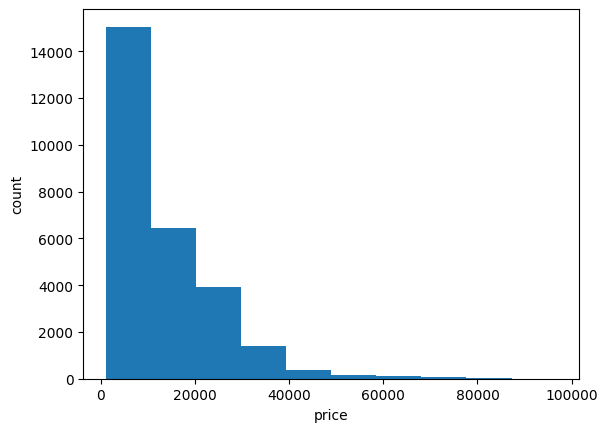

In [6]:
plt.hist(train["price"])
plt.xlabel("price")
plt.ylabel("count")
plt.show()

In [7]:
print(np.max(train["price"]))
print(np.mean(train["price"]))
print(np.min(train["price"]))

96818
13468.724829289555
1004


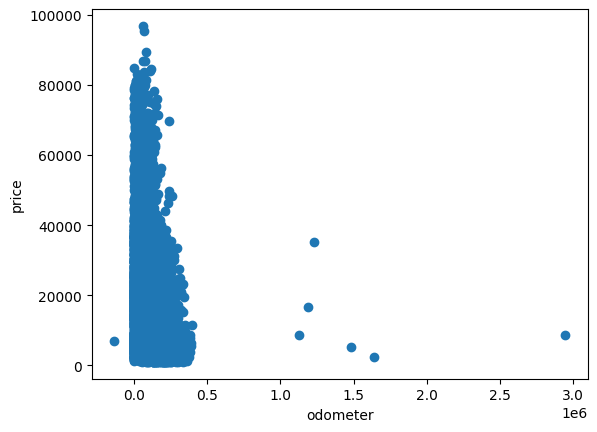

In [9]:
plt.scatter(train["odometer"], train["price"])
plt.xlabel("odometer")
plt.ylabel("price")
plt.show()

# 走行距離（odometer）がマイナスの値になっているデータがある
# 精度を高めるために、マイナスの値のデータは0に変換しておく

In [10]:
train.groupby("condition")["price"].agg(["mean", "count"])

,mean,count
condition,,
excellent,14662.392076,15219
fair,7210.345674,2404
good,11022.550674,6009
like new,16511.362730,3810
new,16274.418182,55
salvage,8640.685714,35


In [11]:
train.groupby("manufacturer")["price"].agg(["mean", "count"]).sort_values(by="count", ascending=False)

,mean,count
manufacturer,,
ford,14835.941129,6166
chevrolet,15060.421683,3339
bmw,14014.950292,2736
toyota,9230.764331,1570
honda,8962.536697,1526
...,...,...
ＭＥＲＣＵＲＹ,6302.000000,1
lexuѕ,16867.000000,1
ＭＩＴＳＵＢＩＳＨＩ,13765.000000,1


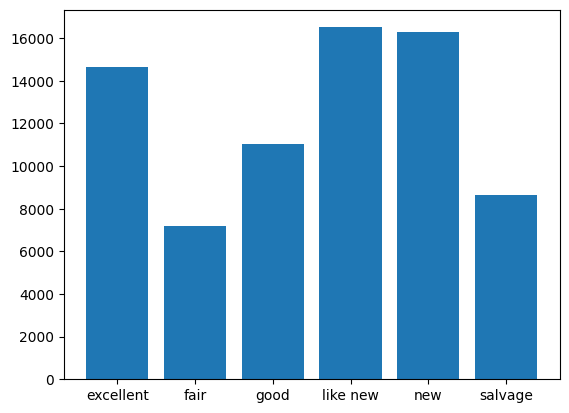

In [12]:
grouped = train.groupby("condition")["price"].mean()
plt.bar(grouped.index, grouped.values)
plt.show()

In [13]:
train = pd.get_dummies(train, columns=["condition", "manufacturer"])
test = pd.get_dummies(test, columns=["condition", "manufacturer"])

In [14]:
train.head()

,id,region,year,cylinders,fuel,odometer,title_status,transmission,drive,size,...,manufacturer_ｍｅｒｃｕｒｙ,manufacturer_ｍｉｔｓｕｂｉｓｈｉ,manufacturer_ｎｉｓｓａｎ,manufacturer_ｐｏｎｔｉａｃ,manufacturer_ｒａｍ,manufacturer_ｓａｔｕｒｎ,manufacturer_ｓｕｂａｒｕ,manufacturer_ｔｏｙｏｔａ,manufacturer_ｖｏｌｋｓｗａｇｅｎ,manufacturer_ｖｏｌｖｏ
0,0,nashville,1949,6 cylinders,gas,115148,clean,manual,rwd,mid-size,...,0,0,0,0,0,0,0,0,0,0
1,1,state college,2013,8 cylinders,gas,172038,clean,automatic,rwd,full-size,...,0,0,0,0,0,0,0,0,0,0
2,2,wichita,1998,6 cylinders,gas,152492,clean,automatic,fwd,full-size,...,0,0,0,0,0,0,0,0,0,0
3,3,albany,2014,4 cylinders,gas,104118,clean,manual,fwd,mid-size,...,0,0,0,0,0,0,0,0,0,0
4,4,redding,2005,6 cylinders,gas,144554,clean,manual,fwd,mid-size,...,0,0,0,0,0,0,0,0,0,0


In [15]:
test.head()

,id,region,year,cylinders,fuel,odometer,title_status,transmission,drive,size,...,manufacturer_ｍｅｒｃｕｒｙ,manufacturer_ｍｉｔｓｕｂｉｓｈｉ,manufacturer_ｎｉｓｓａｎ,manufacturer_ｐｏｎｔｉａｃ,manufacturer_ｒａｍ,manufacturer_ｓａｔｕｒｎ,manufacturer_ｓｕｂａｒｕ,manufacturer_ｔｏｙｏｔａ,manufacturer_ｖｏｌｋｓｗａｇｅｎ,manufacturer_ｖｏｌｖｏ
0,27532,western slope,2015,4 cylinders,gas,92553,clean,automatic,fwd,full-size,...,0,0,0,0,0,0,0,0,0,0
1,27533,roseburg,2013,4 cylinders,gas,134385,salvage,automatic,fwd,mid-size,...,0,0,0,0,0,0,0,0,0,0
2,27534,akron / canton,2011,4 cylinders,gas,102489,clean,automatic,fwd,full-size,...,0,0,0,0,0,0,0,0,0,0
3,27535,denver,2016,6 cylinders,diesel,64310,clean,automatic,4wd,mid-size,...,0,0,0,0,0,0,0,0,0,0
4,27536,hickory / lenoir,1999,8 cylinders,gas,180839,rebuilt,automatic,4wd,mid-size,...,0,0,0,0,0,0,0,0,0,0


In [16]:
train["manufacturer_toyota"].head()

0    0
1    1
2    0
3    0
4    0
Name: manufacturer_toyota, dtype: uint8

In [17]:
train[['condition_excellent', 'condition_fair', 'condition_good', 'condition_like new', 'condition_new', 'condition_salvage']].head()

,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [18]:
target = train["price"]

train = train.drop(columns=['id', 'region', 'year', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state', "price"], axis=1)
test = test.drop(columns=['id', 'region', 'year', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state'], axis=1)

In [19]:
train.head()

,odometer,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,manufacturer_ACURA,manufacturer_AUDI,manufacturer_BMW,...,manufacturer_ｍｅｒｃｕｒｙ,manufacturer_ｍｉｔｓｕｂｉｓｈｉ,manufacturer_ｎｉｓｓａｎ,manufacturer_ｐｏｎｔｉａｃ,manufacturer_ｒａｍ,manufacturer_ｓａｔｕｒｎ,manufacturer_ｓｕｂａｒｕ,manufacturer_ｔｏｙｏｔａ,manufacturer_ｖｏｌｋｓｗａｇｅｎ,manufacturer_ｖｏｌｖｏ
0,115148,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,172038,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,152492,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,104118,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,144554,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(train, target, random_state=82)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(20649, 132) (6883, 132) (20649,) (6883,)


In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [24]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [25]:
pred = model.predict(X_valid)

In [26]:
print(pred[:5])

[ 7148.  5577.  2846.  2458. 33331.]


In [27]:
score = mean_absolute_percentage_error(y_valid, pred)
print(score*100)

95.43942421293022


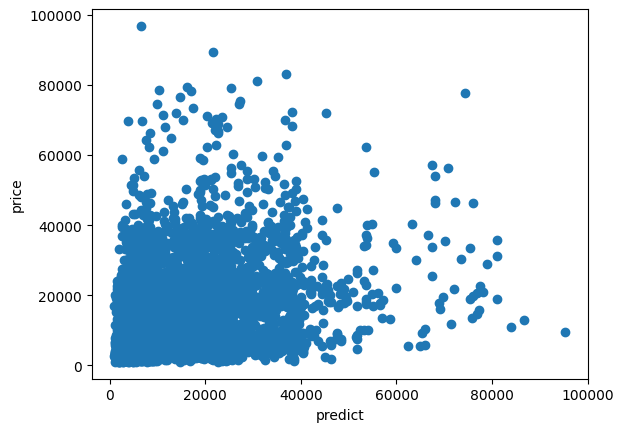

In [28]:
plt.scatter(pred, y_valid)
plt.xlabel("predict")
plt.ylabel("price")
plt.show()

In [29]:
predict = model.predict(test)

In [30]:
submit = pd.read_csv("submit_sample.csv", header=None)
submit.head()

,0,1
0,27532,14994.540583
1,27533,10004.210369
2,27534,8000.623545
3,27535,15062.223593
4,27536,8994.715270


In [31]:
submit[1] = predict

In [32]:
submit.head()

,0,1
0,27532,4143.0
1,27533,24638.0
2,27534,8758.0
3,27535,18111.0
4,27536,7649.0


In [33]:
submit.to_csv("submission.csv", index=False, header=None)